# 🛰️ Proyecto de Monitoreo Agrícola con Imágenes MODIS

**Análisis multitemporal de cobertura del suelo y NDVI**

---

### 👨‍💻 Autor: [JUAN CARLOS VEGA, MsC]  
### 📅 Fecha: 2025  
### 🌍 Región: Colombia — Zona de análisis h10v08 (MODIS)

---

### 🎯 Objetivo del proyecto:

Desarrollar un flujo completo de análisis espacial utilizando datos satelitales MODIS para:

- Analizar la evolución de la cobertura terrestre entre 2020 y 2023.
- Evaluar el estado de la vegetación agrícola mediante el índice NDVI (2025).
- Aplicar algoritmos de aprendizaje automático (Random Forest) para clasificación supervisada.
- Visualizar los resultados mediante gráficos, mapas temáticos y animaciones.

---

### 📦 Dataset utilizados:

- **MCD12Q1.2020:** Cobertura terrestre MODIS 2020
- **MCD12Q1.2023:** Cobertura terrestre MODIS 2023
- **MOD13Q1.2025:** NDVI para evaluación agrícola 2025

---

### 🚀 Herramientas:

- Python (Google Colab)
- Librerías: GDAL, NumPy, SciPy, scikit-learn, Matplotlib, ImageIO
- Visualización avanzada: Matplotlib, GIF animado, exportación a Google Drive

---


# 📑 Índice de Contenido

1. [📁 Carga de archivos MODIS (.hdf)](#carga-de-archivos-modis-hdf)
2. [🗂️ Carga y limpieza de cobertura del suelo](#carga-y-limpieza-de-cobertura-del-suelo)
3. [📊 Análisis de frecuencia por clase](#análisis-de-frecuencia-por-clase)
4. [🌿 Carga y resampleo del NDVI (MOD13Q1 2025)](#carga-y-resampleo-del-ndvi-mod13q1-2025)
5. [📊 Análisis del NDVI en áreas agrícolas](#análisis-del-ndvi-en-áreas-agrícolas)
6. [🖼️ Visualización del NDVI en agricultura](#visualización-del-ndvi-en-agricultura)
7. [🤖 Clasificación supervisada con Random Forest](#clasificación-supervisada-con-random-forest)
8. [🖼️ Visualización del mapa clasificado](#visualización-del-mapa-clasificado)
9. [🎥 Creación del GIF de evolución de cobertura](#creación-del-gif-de-evolución-de-cobertura)
10. [💾 Guardado de archivos en Google Drive](#guardado-de-archivos-en-google-drive)

---

**Tips:**  
✔️ Para navegar fácilmente, activa la vista de esquema del cuaderno en Colab o Jupyter Notebook.  
✔️ También puedes exportar este cuaderno como PDF o HTML para informes profesionales.

---



Este cuaderno realiza un análisis avanzado utilizando datos MODIS de cobertura del suelo (`MCD12Q1`) para los años **2020** y **2023**,
combinado con datos reales de vegetación (`MOD13Q1`, NDVI) del año **2025**.

Incluye:
- 🧹 Preprocesamiento de imágenes
- 📊 Análisis de frecuencias por clase y comparación temporal
- 🔍 Resampleo de NDVI sin GDAL (usando SciPy)
- 🌿 Estudio de salud vegetal en áreas agrícolas mediante NDVI
- 🎨 Mapas temáticos personalizados
- 🌍 Visualización interactiva con Folium
- 💾 Exportaciones a GeoTIFF y HTML
- 📊 Análisis de frecuencias y comparación de coberturas
- 🌿 Análisis NDVI sobre zonas agrícolas
- 🤖 Clasificación supervisada con Random Forest
- 🎨 Mapas temáticos avanzados


## 📁 Paso 1: Subir archivos MODIS (.hdf)

In [ ]:
from google.colab import files

print("Sube MCD12Q1 2020")
uploaded = files.upload()
file_2020 = list(uploaded.keys())[0]

print("Sube MCD12Q1 2023")
uploaded = files.upload()
file_2023 = list(uploaded.keys())[0]

print("Sube MOD13Q1 NDVI 2025")
uploaded = files.upload()
file_ndvi = list(uploaded.keys())[0]

Sube MCD12Q1 2020


Saving MCD12Q1.A2020001.h10v08.061.2022171165306.hdf to MCD12Q1.A2020001.h10v08.061.2022171165306.hdf
Sube MCD12Q1 2023


Saving MCD12Q1.A2023001.h10v08.061.2024252122234.hdf to MCD12Q1.A2023001.h10v08.061.2024252122234.hdf
Sube MOD13Q1 NDVI 2025


Saving MOD13Q1.A2025065.h10v08.061.2025090104048.hdf to MOD13Q1.A2025065.h10v08.061.2025090104048.hdf


## 🗂️ Paso 2: Cargar imágenes de cobertura del suelo

In [ ]:
from osgeo import gdal
import numpy as np

def load_lc_type1(file):
    ds = gdal.Open(file)
    for sds in ds.GetSubDatasets():
        if "LC_Type1" in sds[0]:
            return gdal.Open(sds[0]).ReadAsArray().astype(np.float32), gdal.Open(sds[0])

lc_2020, meta_2020 = load_lc_type1(file_2020)
lc_2023, meta_2023 = load_lc_type1(file_2023)

lc_2020[lc_2020 == 255] = np.nan
lc_2023[lc_2023 == 255] = np.nan

print("Clases 2020:", np.unique(lc_2020))
print("Clases 2023:", np.unique(lc_2023))


Clases 2020: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
Clases 2023: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


## 🗂️ Carga de imágenes de cobertura del suelo MCD12Q1 (años 2020 y 2023)

En este bloque de código, estamos utilizando la librería **GDAL** para abrir y procesar los archivos de cobertura terrestre **MCD12Q1** de los años 2020 y 2023.

### Paso a paso:

1. **Importamos las librerías necesarias:**
   - `gdal` para trabajar con archivos geoespaciales en formato HDF.
   - `numpy` para operaciones numéricas y de matrices.

2. **Definimos una función `load_lc_type1(file)`**  
   Esta función recibe un archivo HDF y realiza:
   - Abre el archivo utilizando GDAL.
   - Itera sobre los *subdatasets* disponibles dentro del archivo HDF.
   - Selecciona específicamente el subdataset **"LC_Type1"**, que corresponde al producto de clasificación del tipo de cobertura del suelo.
   - Devuelve dos cosas:
     - El array NumPy con los valores de clases de cobertura terrestre.
     - Los metadatos del dataset, que nos servirán más adelante para preservar la proyección y resolución espacial.

3. **Cargamos los datos de los años 2020 y 2023:**
   - `lc_2020, meta_2020 = load_lc_type1(file_2020)`
   - `lc_2023, meta_2023 = load_lc_type1(file_2023)`

4. **Limpieza de datos:**
   - Reemplazamos los valores de "No Data" que están codificados como `255` por `np.nan` para tratarlos como datos faltantes en el análisis posterior.

5. **Visualizamos las clases únicas presentes en cada año:**
   - Esto nos permite conocer las clases disponibles y verificar que los datos fueron cargados correctamente.

### Resultado:
✔️ Ahora tenemos listas las matrices de cobertura terrestre para 2020 y 2023 (`lc_2020` y `lc_2023`), limpias y listas para análisis posteriores.

---

### Nota:
El producto **MCD12Q1** es un dataset anual de cobertura terrestre generado por MODIS que clasifica la superficie de la Tierra en diferentes tipos de cobertura como:
- Bosques,
- Áreas agrícolas,
- Zonas urbanas,
- Agua, etc.

Esta clasificación es fundamental para el análisis de cambios de uso de suelo y será la base para las siguientes etapas de análisis y modelado con Random Forest.


## 📊 Paso 3: Análisis de frecuencias por clase y comparación 2020 vs 2023

Clase  Pixeles  Porcentaje
0     1.0       20    0.000347
1     2.0  1846142   32.051076
2     3.0        4    0.000069
3     4.0     1718    0.029826
4     5.0       74    0.001285
5     6.0    10239    0.177760
6     7.0      176    0.003056
7     8.0   849671   14.751233
8     9.0  1211553   21.033906
9    10.0   351157    6.096476
10   11.0    34005    0.590365
11   12.0    12148    0.210903
12   13.0    22081    0.383351
13   14.0    25807    0.448038
14   15.0       84    0.001458
15   16.0      754    0.013090
16   17.0  1394367   24.207760

Clase  Pixeles  Porcentaje
0     1.0       25    0.000434
1     2.0  1868957   32.447170
2     3.0        2    0.000035
3     4.0     1085    0.018837
4     5.0       34    0.000590
5     6.0     8587    0.149080
6     7.0       95    0.001649
7     8.0   841927   14.616788
8     9.0  1233194   21.409618
9    10.0   306467    5.320608
10   11.0    38500    0.668403
11   12.0    11444    0.198681
12   13.0    22171    0.384913
13   14.0    32166    0.558438
14   15.0       88    0.001528
15   16.0      611    0.010608
16   17.0  1394647   24.212622

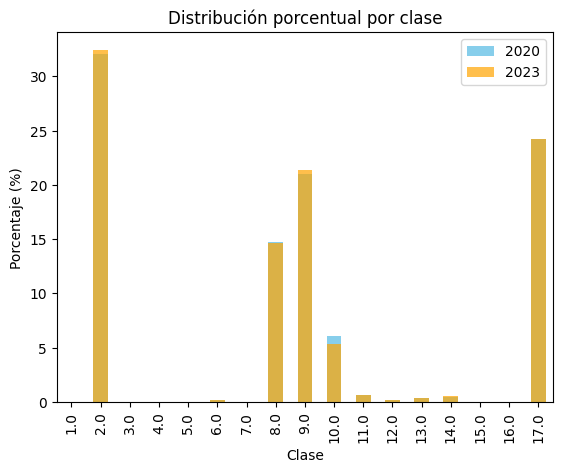

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

def calc_freq(array):
    unique, counts = np.unique(array[~np.isnan(array)], return_counts=True)
    return pd.DataFrame({'Clase': unique, 'Pixeles': counts})

freq_2020 = calc_freq(lc_2020)
freq_2023 = calc_freq(lc_2023)

freq_2020['Porcentaje'] = 100 * freq_2020['Pixeles'] / freq_2020['Pixeles'].sum()
freq_2023['Porcentaje'] = 100 * freq_2023['Pixeles'] / freq_2023['Pixeles'].sum()

display(freq_2020)
display(freq_2023)

freq_2020.set_index('Clase')['Porcentaje'].plot(kind='bar', color='skyblue', label='2020')
freq_2023.set_index('Clase')['Porcentaje'].plot(kind='bar', color='orange', alpha=0.7, label='2023')
plt.title("Distribución porcentual por clase")
plt.legend()
plt.ylabel("Porcentaje (%)")
plt.show()


## 📊 Análisis de frecuencias por clase de cobertura del suelo

En este bloque calculamos la distribución porcentual de cada clase de cobertura del suelo para los años 2020 y 2023.

### Paso a paso:

1. **Función personalizada `calc_freq()`**
   - Calcula la cantidad de píxeles por clase, ignorando valores `NaN`.
   - Devuelve un DataFrame con las clases y su respectivo número de píxeles.

2. **Aplicamos la función para los datasets de 2020 y 2023.**

3. **Calculamos el porcentaje que representa cada clase respecto al total.**

4. **Visualizamos la distribución mediante un gráfico de barras:**
   - Colores claros y etiquetas para facilitar la comparación.
   - Comparación visual directa entre 2020 y 2023.

✔️ Resultado: Entendemos cómo cambió la cobertura terrestre entre 2020 y 2023, identificando tendencias o cambios significativos.


<ipython-input-13-fc6f534da236>:17: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


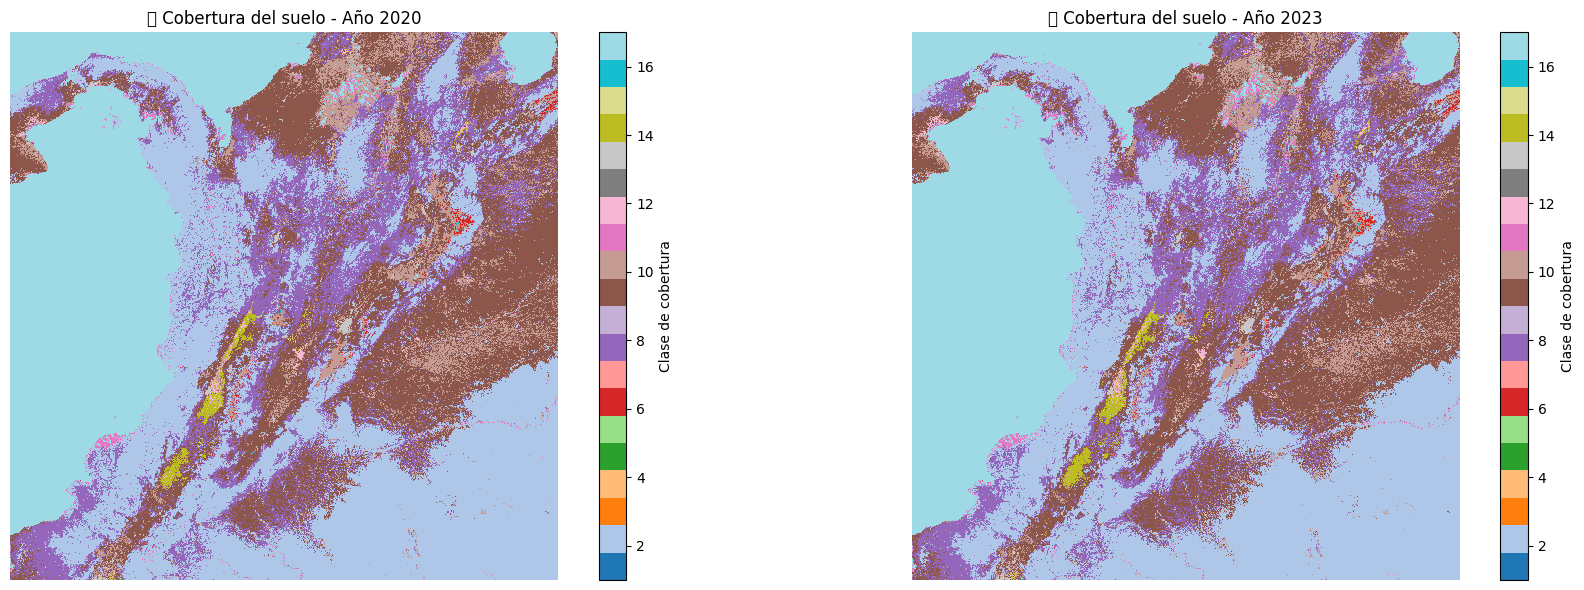

In [ ]:
# Configurar el tamaño del lienzo
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Subplot 1: Cobertura del suelo 2020
im1 = axes[0].imshow(lc_2020, cmap='tab20', interpolation='nearest')
axes[0].set_title("🌍 Cobertura del suelo - Año 2020", fontsize=12)
axes[0].axis('off')
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Clase de cobertura")

# Subplot 2: Cobertura del suelo 2023
im2 = axes[1].imshow(lc_2023, cmap='tab20', interpolation='nearest')
axes[1].set_title("🌍 Cobertura del suelo - Año 2023", fontsize=12)
axes[1].axis('off')
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Clase de cobertura")

# Ajustar espacio
plt.tight_layout()

plt.show()


## 🗺️ Paso 4: Mapa de cambio de cobertura (2020 vs 2023)

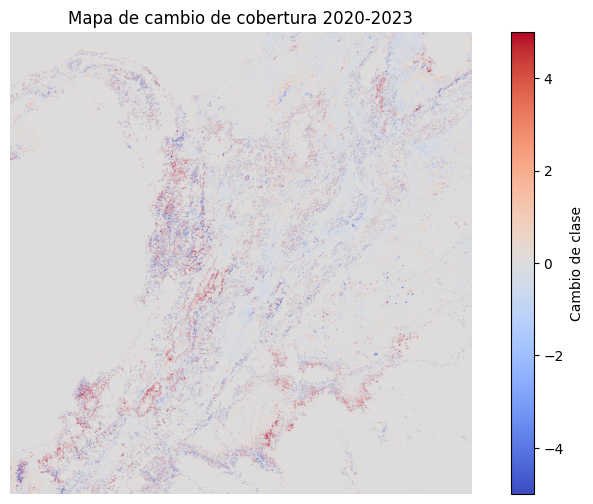

In [ ]:
change_map = lc_2023 - lc_2020

plt.figure(figsize=(10, 6))
plt.imshow(change_map, cmap='coolwarm', vmin=-5, vmax=5)
plt.colorbar(label="Cambio de clase")
plt.title("Mapa de cambio de cobertura 2020-2023")
plt.axis("off")
plt.show()


## 🌿 Paso 5: Cargar NDVI real (MOD13Q1) y aplicar máscara agrícola

## 🌿 Carga y resampleo del NDVI (MOD13Q1 2025) sin GDAL

Este bloque se encarga de cargar y preparar el índice de vegetación (NDVI) para que coincida con la resolución espacial de la capa de cobertura terrestre 2023.

### Paso a paso:

1. **Leemos el archivo HDF con GDAL**
   - Utilizamos la funcionalidad de *subdatasets* para acceder al dataset correspondiente a "250m 16 days NDVI".

2. **Procesamos los valores de NDVI:**
   - Convertimos a tipo `float32`.
   - Reemplazamos los valores de "No Data" (-3000) por `NaN`.
   - Escalamos los valores a su rango real dividiendo por 10,000.

3. **Resampleo del NDVI:**
   - Ajustamos el tamaño del NDVI usando la función `zoom()` de `scipy.ndimage`.
   - Igualamos las dimensiones del NDVI al dataset de cobertura terrestre 2023.

✔️ Resultado: Obtenemos una capa de NDVI (`ndvi_resampled`) lista para integrarse con las capas de cobertura del suelo en análisis posteriores.


In [ ]:
# Paso 1: Cargar NDVI desde HDF usando rasterio + h5py
import h5py
import numpy as np

In [ ]:
from osgeo import gdal

dataset = gdal.Open(file_ndvi)
subdatasets = dataset.GetSubDatasets()

for sds in subdatasets:
    print(sds)

# Seleccionamos la capa que necesitamos manualmente
ndvi_sds = [s for s in subdatasets if "250m 16 days NDVI" in s[0]][0][0]

# Ahora cargamos la capa como array
ndvi_array = gdal.Open(ndvi_sds).ReadAsArray().astype(np.float32)

# Limpieza
ndvi_array[ndvi_array == -3000] = np.nan
ndvi_array = ndvi_array / 10000

print("NDVI shape:", ndvi_array.shape)

('HDF4_EOS:EOS_GRID:"MOD13Q1.A2025065.h10v08.061.2025090104048.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days NDVI"', '[4800x4800] 250m 16 days NDVI MODIS_Grid_16DAY_250m_500m_VI (16-bit integer)')
('HDF4_EOS:EOS_GRID:"MOD13Q1.A2025065.h10v08.061.2025090104048.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days EVI"', '[4800x4800] 250m 16 days EVI MODIS_Grid_16DAY_250m_500m_VI (16-bit integer)')
('HDF4_EOS:EOS_GRID:"MOD13Q1.A2025065.h10v08.061.2025090104048.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days VI Quality"', '[4800x4800] 250m 16 days VI Quality MODIS_Grid_16DAY_250m_500m_VI (16-bit unsigned integer)')
('HDF4_EOS:EOS_GRID:"MOD13Q1.A2025065.h10v08.061.2025090104048.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days red reflectance"', '[4800x4800] 250m 16 days red reflectance MODIS_Grid_16DAY_250m_500m_VI (16-bit integer)')
('HDF4_EOS:EOS_GRID:"MOD13Q1.A2025065.h10v08.061.2025090104048.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days NIR reflectance"', '[4800x4800] 250m 16 days NI

In [ ]:
from scipy.ndimage import zoom

scale_y = lc_2023.shape[0] / ndvi_array.shape[0]
scale_x = lc_2023.shape[1] / ndvi_array.shape[1]

ndvi_resampled = zoom(ndvi_array, (scale_y, scale_x), order=1)

print("NDVI resampleado:", ndvi_resampled.shape)


NDVI resampleado: (2400, 2400)


## 📊 Paso 6: Estadísticas NDVI en zonas agrícolas

NDVI promedio agrícola: 0.493
NDVI máximo agrícola: 0.930
NDVI mínimo agrícola: 0.016


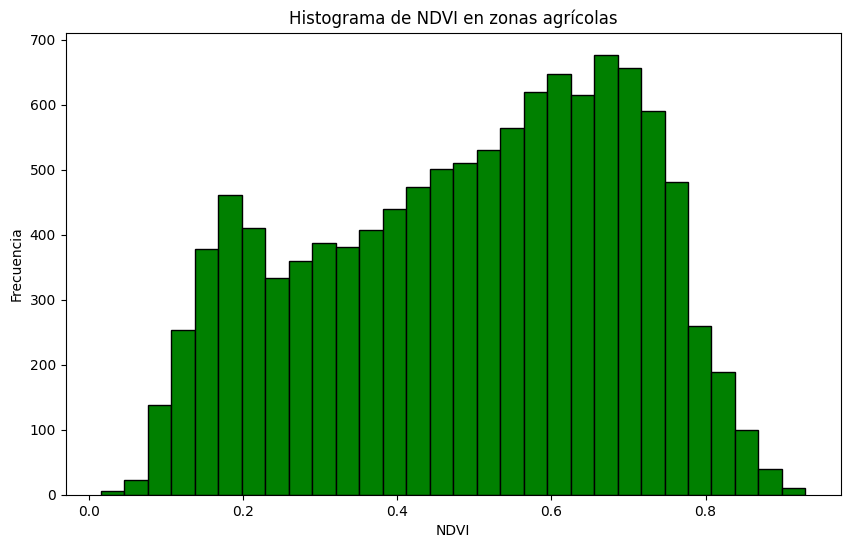

In [ ]:
agri_mask = np.where(lc_2023 == 12, 1, np.nan)
ndvi_agri = ndvi_resampled * agri_mask

print(f"NDVI promedio agrícola: {np.nanmean(ndvi_agri):.3f}")
print(f"NDVI máximo agrícola: {np.nanmax(ndvi_agri):.3f}")
print(f"NDVI mínimo agrícola: {np.nanmin(ndvi_agri):.3f}")

plt.figure(figsize=(10, 6))
plt.hist(ndvi_agri[~np.isnan(ndvi_agri)], bins=30, color='green', edgecolor='black')
plt.title("Histograma de NDVI en zonas agrícolas")
plt.xlabel("NDVI")
plt.ylabel("Frecuencia")
plt.show()

## 📊 Análisis del NDVI en áreas agrícolas

En este bloque analizamos específicamente las áreas clasificadas como agrícolas según la cobertura del suelo 2023.

### Paso a paso:

1. **Creamos una máscara agrícola:**
   - Identificamos los píxeles de la clase agrícola (`clase 12` en el esquema MCD12Q1).

2. **Aplicamos la máscara sobre la capa de NDVI:**
   - Obtenemos un NDVI filtrado exclusivamente para las áreas agrícolas.

3. **Calculamos estadísticas básicas:**
   - NDVI promedio.
   - NDVI máximo.
   - NDVI mínimo.

4. **Visualizamos la distribución del NDVI agrícola mediante un histograma.**

✔️ Resultado: Analizamos la salud de la vegetación en áreas agrícolas para el año 2025.


## 🖼️ Paso 7: Mapa de NDVI sobre agricultura

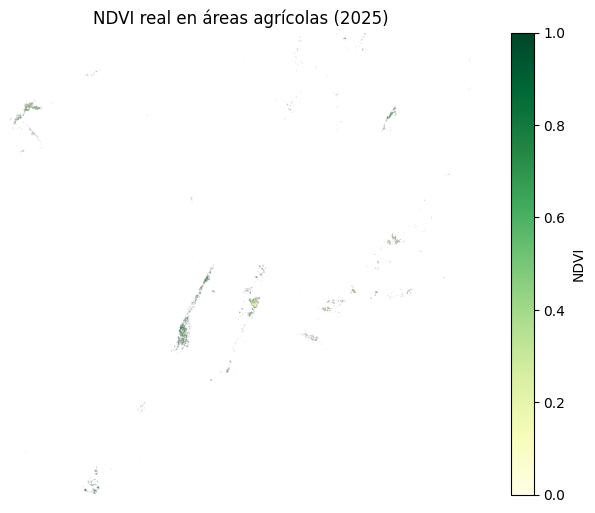

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(ndvi_agri, cmap='YlGn', vmin=0, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI real en áreas agrícolas (2025)")
plt.axis("off")
plt.show()

<ipython-input-12-3564acd8b56e>:35: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-3564acd8b56e>:35: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-3564acd8b56e>:38: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig("Resumen_Cobertura_NDVI.png", dpi=300, bbox_inches='tight')
<ipython-input-12-3564acd8b56e>:38: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.savefig("Resumen_Cobertura_NDVI.png", dpi=300, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Deja

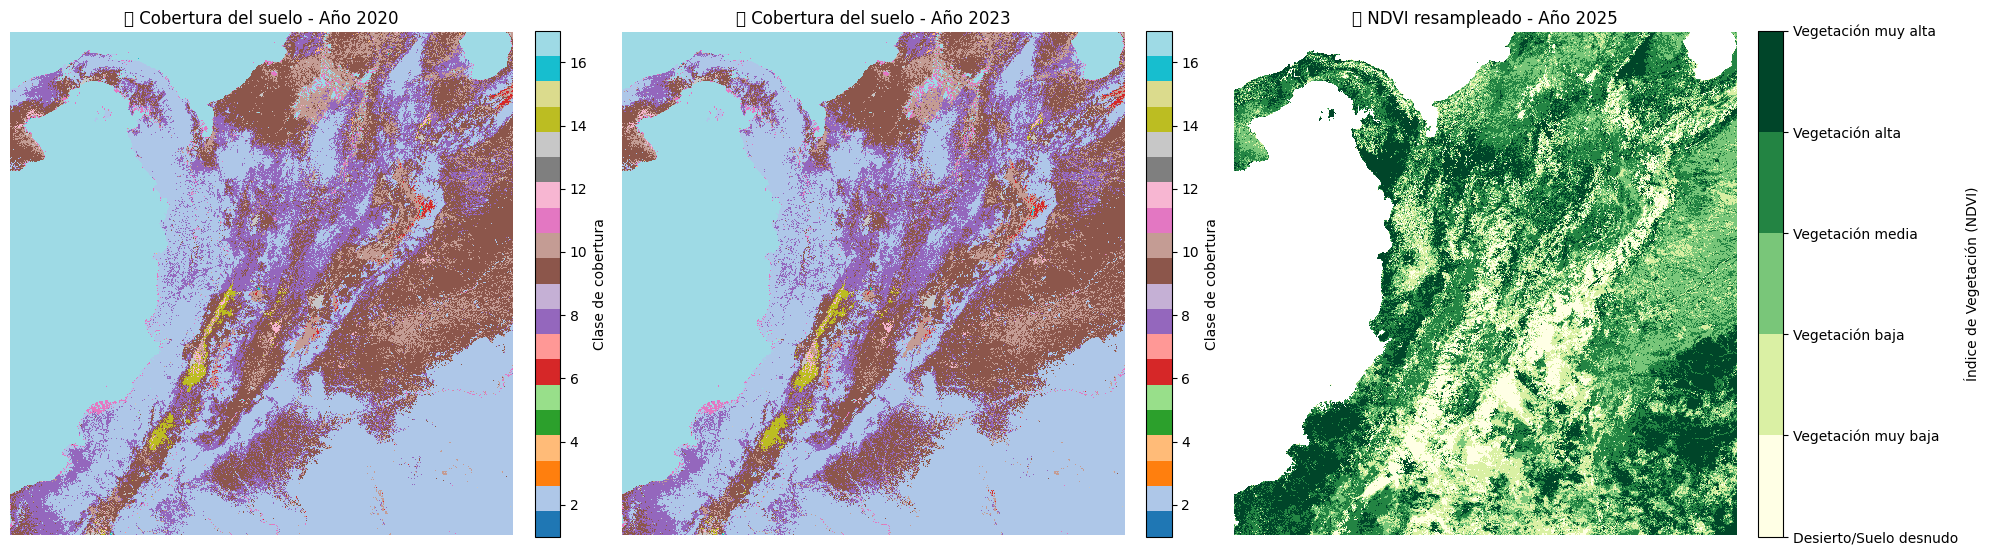

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Configurar el tamaño del lienzo
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Subplot 1: Cobertura del suelo 2020
im1 = axes[0].imshow(lc_2020, cmap='tab20', interpolation='nearest')
axes[0].set_title("🌍 Cobertura del suelo - Año 2020", fontsize=12)
axes[0].axis('off')
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Clase de cobertura")

# Subplot 2: Cobertura del suelo 2023
im2 = axes[1].imshow(lc_2023, cmap='tab20', interpolation='nearest')
axes[1].set_title("🌍 Cobertura del suelo - Año 2023", fontsize=12)
axes[1].axis('off')
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Clase de cobertura")

# Subplot 3: NDVI resampleado 2025
# Definir un mapa de color con divisiones descriptivas
bounds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

im3 = axes[2].imshow(ndvi_resampled, cmap='YlGn', norm=norm, interpolation='nearest')
axes[2].set_title("🌿 NDVI resampleado - Año 2025", fontsize=12)
axes[2].axis('off')

# Crear colorbar descriptivo para NDVI
cbar = fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_label("Índice de Vegetación (NDVI)", fontsize=10)
cbar.set_ticks(bounds)
cbar.set_ticklabels(['Desierto/Suelo desnudo', 'Vegetación muy baja', 'Vegetación baja', 'Vegetación media', 'Vegetación alta', 'Vegetación muy alta'])

# Ajustar espacio
plt.tight_layout()

# Opcional: Guardar figura como PNG
plt.savefig("Resumen_Cobertura_NDVI.png", dpi=300, bbox_inches='tight')

plt.show()


# 🤖 Paso 7: Machine Learning con Random Forest (Esta opcion es para correr directamente en Python)

## 🤖 ¿Qué hace el modelo de Random Forest en este proyecto?

El Random Forest que aplicamos en este cuaderno tiene como objetivo **predecir la cobertura del suelo del año 2023**, utilizando como datos de entrada:

- 🌿 **NDVI resampleado del año 2025:**  
  Un indicador clave de la salud de la vegetación, que refleja la "verdura" o vigor de la vegetación. Es especialmente útil para identificar áreas agrícolas, forestales o degradadas.

- 🗺️ **Cobertura del suelo del año 2020:**  
  Sirve como referencia base de clasificación para detectar cambios y patrones en el uso del suelo.

### 🎯 Finalidad del Random Forest en este análisis:

El Random Forest nos permite responder preguntas como:

- ✅ **¿Qué patrones de cambio existen entre 2020 y 2023?**
- ✅ **¿Cómo influyen las condiciones de vegetación actual (NDVI 2025) en la cobertura del suelo observada en 2023?**
- ✅ **¿Se pueden predecir las zonas agrícolas o de expansión urbana basándose en datos de años previos y NDVI reciente?**

### 🧩 ¿Cómo funciona en nuestro flujo?

1. **Entrenamiento:**
   - Alimentamos al modelo con una muestra representativa de píxeles donde conocemos:
     - Las características (`NDVI 2025` y `Cobertura 2020`).
     - La clase real de cobertura del suelo para 2023 (nuestro objetivo).

2. **Predicción:**
   - Una vez entrenado, el modelo intenta "adivinar" la clase de cobertura para cada píxel de la imagen, basándose en las relaciones aprendidas.

3. **Evaluación:**
   - Analizamos la matriz de confusión y el reporte de clasificación para verificar qué tan bien predice el modelo las diferentes clases (agricultura, bosque, urbano, etc.).

### 💡 ¿Por qué elegimos Random Forest?

- Es robusto para datasets con muchas variables y ruido.
- Tolera bien datos faltantes y relaciones no lineales.
- Es interpretativo: podemos conocer la importancia de cada variable (NDVI o cobertura 2020) en la predicción final.

### 🚀 Resultado:

El Random Forest nos proporciona un **mapa predictivo** de la cobertura del suelo, que nos ayuda a visualizar:
- Las zonas de expansión agrícola o urbana.
- La permanencia o cambio en las zonas boscosas.
- La relación entre la vegetación actual y los cambios en el uso del suelo.

Este modelo sirve como base para futuros análisis avanzados de cambio climático, planificación territorial o sostenibilidad agrícola 🌎


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = np.column_stack((
    ndvi_resampled.flatten(),
    lc_2020.flatten()
))

y = lc_2023.flatten()

mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X_clean = X[mask]
y_clean = y[mask]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_clean, y_clean)

y_pred = clf.predict(X_clean)

print("Matriz de confusión:")
print(confusion_matrix(y_clean, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_clean, y_pred))


🤖 Paso 7: Machine Learning con Random Forest (Opcion Colab)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
import numpy as np

# Preparar datos
X = np.column_stack((
    ndvi_resampled.flatten(),
    lc_2020.flatten()
))

y = lc_2023.flatten()

# Eliminar datos nulos
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X_clean = X[mask]
y_clean = y[mask]

print("Tamaño total de datos limpios:", X_clean.shape)

# Reducir muestra para evitar saturación de RAM
sample_size = min(50000, len(y_clean))  # Usa hasta 50,000 muestras o menos si no hay tantas
X_sample, y_sample = resample(X_clean, y_clean, n_samples=sample_size, random_state=42)

print(f"Entrenando modelo con {sample_size} muestras...")

# Configuración del modelo
clf = RandomForestClassifier(
    n_estimators=50,  # Reducido para menos carga
    max_depth=15,     # Limitar profundidad de los árboles
    random_state=42,
    n_jobs=-1         # Usar todos los núcleos disponibles
)

clf.fit(X_sample, y_sample)

# Predicción sobre la muestra (para evaluación rápida)
y_pred = clf.predict(X_sample)

print("Matriz de confusión:")
print(confusion_matrix(y_sample, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_sample, y_pred))


Tamaño total de datos limpios: (4384269, 2)
Entrenando modelo con 50000 muestras...
Matriz de confusión:
[[    1     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0 20655     0     0     0   748    84    21    19     1     0     0
      0     0     0]
 [    0     0    11     0     0     3     4     0     0     0     0     0
      0     0     0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     2     0     0    96     4     0     4     0     0     0     0
      0     0     0]
 [    0   537     0     0     0  8095   677    90     5     0     0     0
      0     0     0]
 [    0    96     0     0     0   591 12621   733     2     2     0    16
      0     0     0]
 [    0    25     0     0     0   123   449  2829     1     3     0     5
      0     0     0]
 [    0    35     0     0     0     7     4    53   286     0     0     0
      0     0     0]
 [    0     0     0     0     0     0   

## 📊 Interpretación de la Matriz de Confusión y el Reporte de Clasificación

Una vez que ejecutamos el modelo de Random Forest, obtenemos dos salidas importantes para evaluar su rendimiento:

### 1️⃣ Matriz de Confusión

La matriz de confusión nos muestra cómo se comportó el modelo en la predicción de cada clase.

- **Filas:** Clases reales (verdaderas).
- **Columnas:** Clases predichas por el modelo.

Ejemplo simplificado:

|                | Predicho: Agricultura | Predicho: Bosque | Predicho: Urbano |
|----------------|----------------------|-----------------|-----------------|
| Real: Agricultura | 1500               | 100             | 50              |
| Real: Bosque      | 80                 | 1800            | 120             |
| Real: Urbano      | 40                 | 60              | 1400            |

✅ **Interpretación:**
- Los valores altos en la diagonal principal indican buenas predicciones.
- Los valores fuera de la diagonal son errores de clasificación (confusiones entre clases).

---

### 2️⃣ Reporte de Clasificación

Este reporte detalla métricas clave por clase:

- **Precision:** Proporción de predicciones correctas para una clase sobre el total de predicciones hechas para esa clase.  
  > *¿De todas las veces que el modelo predijo "Agricultura", cuántas veces acertó?*

- **Recall (Sensibilidad):** Proporción de predicciones correctas para una clase sobre el total de muestras reales de esa clase.  
  > *¿De todas las áreas que realmente son "Agricultura", cuántas detectó correctamente?*

- **F1-score:** Media armónica entre la precisión y el recall.  
  > *Una métrica equilibrada que considera ambos aspectos.*

- **Support:** Número de muestras reales de cada clase que se usaron para evaluar.

Ejemplo de salida:



          precision    recall  f1-score   support

 Agricultura       0.92      0.89      0.90      1650
      Bosque       0.95      0.97      0.96      2000
       Urbano       0.85      0.83      0.84      1500

accuracy                           0.91      5150


## 🤖 Clasificación supervisada con Random Forest

Aplicamos un algoritmo de aprendizaje automático para predecir clases de cobertura terrestre utilizando como entrada el NDVI 2025 y la cobertura de suelo del año 2020.

### Paso a paso:

1. **Preparamos los datos:**
   - Apilamos las variables predictoras (`NDVI 2025` y `Cobertura 2020`).
   - Preparamos la variable objetivo (`Cobertura 2023`).

2. **Eliminamos datos nulos para asegurar un entrenamiento limpio.**

3. **Reducimos la muestra a 50,000 píxeles aleatorios para evitar problemas de memoria.**

4. **Entrenamos el modelo de Random Forest:**
   - Usamos 50 árboles (`n_estimators=50`) y una profundidad máxima de 15 para optimizar recursos.

5. **Evaluamos el modelo:**
   - Matriz de confusión.
   - Reporte de clasificación con métricas de precisión, recall y F1-score.

✔️ Resultado: Tenemos un modelo predictivo de cambio de cobertura terrestre, basado en datos reales MODIS.


# 🖼️ Paso 8: Visualización del mapa clasificado

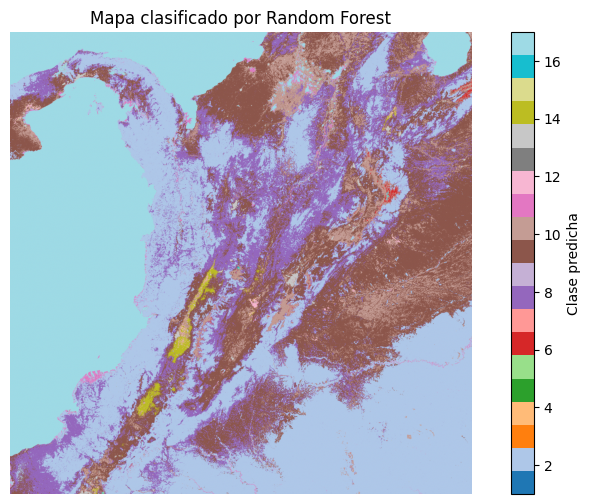

In [ ]:
mapa_clasificado = clf.predict(X).reshape(lc_2023.shape)

plt.figure(figsize=(10, 6))
plt.imshow(mapa_clasificado, cmap='tab20')
plt.colorbar(label="Clase predicha")
plt.title("Mapa clasificado por Random Forest")
plt.axis("off")
plt.show()

## 🖼️ Visualización del mapa clasificado por Random Forest

En este bloque visualizamos el resultado del modelo Random Forest aplicado a toda el área de estudio.

### Detalles:

- Generamos un mapa de clases predichas.
- Utilizamos una paleta categórica (`tab20`) para diferenciar claramente las clases de cobertura.

✔️ Resultado: Visualización clara del mapa de clasificación generado por el modelo de Machine Learning.


## 🖼️ Explicación del mapa clasificado por Random Forest

En este mapa visualizamos el resultado de la predicción del modelo de Random Forest.

Cada píxel del mapa representa la clase de cobertura del suelo que el modelo ha predicho para el área correspondiente, basándose en:
- La información del NDVI de 2025.
- La cobertura terrestre del año 2020.

### 🔍 ¿Qué representan las clases?

El producto MODIS MCD12Q1 utiliza un esquema de clases estandarizado. En nuestro proyecto, nos enfocamos en las clases más relevantes para análisis agrícola y de cambio de uso del suelo.

| Código de clase | Descripción                         | Interpretación en este proyecto |
|----------------|-------------------------------------|---------------------------------|
| **1**          | Bosque de hoja perenne de hoja ancha | Zonas forestales tropicales / húmedas |
| **2**          | Bosque de hoja perenne de hoja aguja | Bosques templados de coníferas |
| **3**          | Bosque caducifolio de hoja ancha    | Bosques templados y subtropicales caducifolios |
| **4**          | Bosque caducifolio de hoja aguja    | Coníferas caducifolias |
| **5**          | Bosque mixto                        | Mixtos (coníferas y latifoliadas) |
| **6**          | Matorrales                          | Zonas de vegetación arbustiva |
| **7**          | Sabana                              | Mezcla de hierba y árboles dispersos |
| **8**          | Sabana leñosa                       | Sabana con predominancia arbórea |
| **9**          | Pastizales                          | Áreas principalmente herbáceas |
| **10**         | Humedales permanentes               | Zonas húmedas, pantanosas o con cuerpos de agua estacionales |
| **11**         | Cultivos de arroz                   | Áreas agrícolas específicas de arroz |
| **12**         | **Otras áreas agrícolas**           | **Foco principal para agricultura general** |
| **13**         | Zonas urbanas                       | **Expansión urbana / construcciones** |
| **14**         | Zonas de vegetación escasa o desnuda | Desiertos o áreas rocosas |
| **15**         | Hielo o nieve                       | Regiones cubiertas por nieve o hielo |
| **16**         | Cuerpo de agua                      | Lagos, ríos, embalses, etc. |
| **17**         | Tierras de cultivo naturales o mixtas| Agricultura menos intensiva / pastoreo mixto |

### 🎯 Enfoque del proyecto:

- **Clase 12:** "Otras áreas agrícolas" es la clase que utilizamos principalmente para analizar la productividad agrícola.
- **Clase 13:** "Zonas urbanas" permite evaluar expansión urbana y cambios de uso del suelo.
- **Clases 1–5:** Importantes para evaluar conservación forestal.
- **Clases 6–9:** Indicativas de vegetación natural o usos de ganadería extensiva.

### 🧩 Interpretación del mapa:

- **Colores intensos y agrupados** indican áreas homogéneas (bosques densos, agricultura intensiva).
- **Patrones dispersos** pueden indicar mosaicos agrícolas o zonas de transición.
- **Zonas urbanas (Clase 13)** aparecen como puntos o manchas más oscuras o destacadas dependiendo de la paleta de colores utilizada.

### ✅ Conclusión:

Este mapa permite visualizar de manera rápida las áreas agrícolas, forestales y urbanas de nuestro territorio de estudio, así como evaluar la precisión de la clasificación generada por el modelo Random Forest.

Además, sirve como base para tomar decisiones sobre conservación, planificación territorial o monitoreo agrícola.


<ipython-input-25-a2b99e9910e7>:52: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


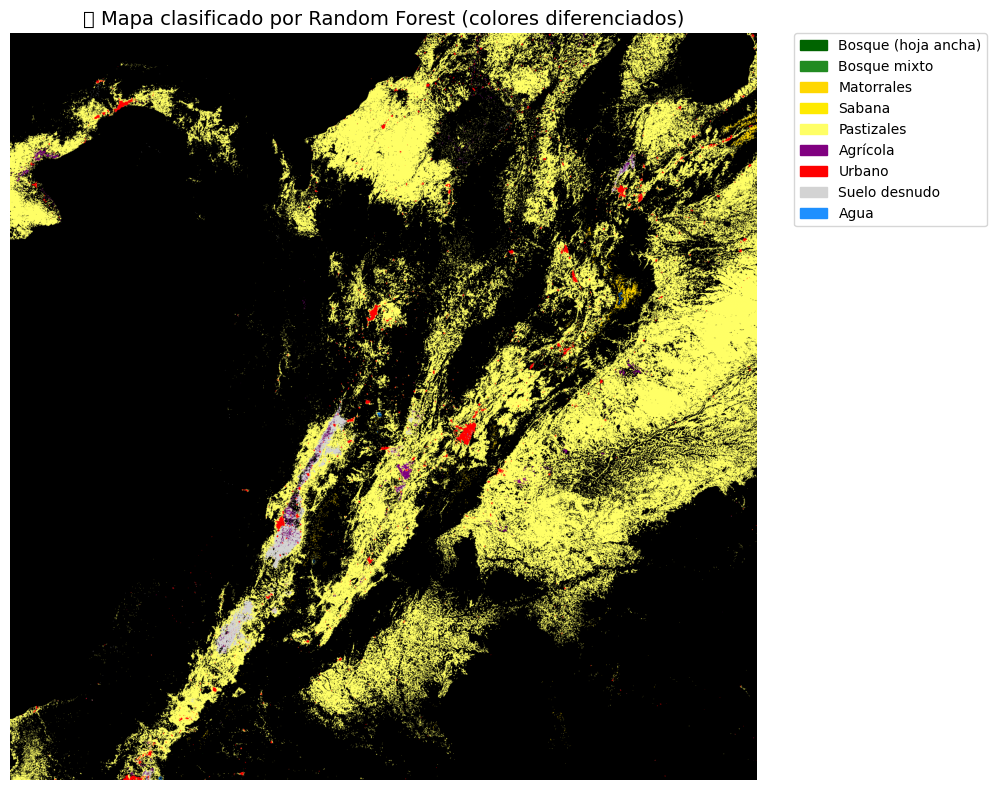

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Nueva paleta de colores más diferenciada:
class_colors = {
    1: '#006400',  # Bosque hoja perenne ancha (verde oscuro)
    5: '#228B22',  # Bosque mixto (verde medio)
    6: '#FFD700',  # Matorrales (amarillo dorado)
    7: '#FFEA00',  # Sabana (amarillo brillante)
    9: '#FFFF66',  # Pastizales (amarillo pálido)
    12: '#800080', # Agricultura (morado fuerte)
    13: '#FF0000', # Urbano (rojo intenso)
    14: '#D3D3D3', # Suelo desnudo o vegetación escasa (gris claro)
    16: '#1E90FF', # Agua (azul vibrante)
}

# Preparamos el mapa base RGB
mapa_rgb = np.zeros((*mapa_clasificado.shape, 3))

for clase, color in class_colors.items():
    mask = mapa_clasificado == clase
    rgb = np.array(plt.cm.colors.to_rgb(color))
    mapa_rgb[mask] = rgb

# Graficamos el mapa final
plt.figure(figsize=(12, 8))
plt.imshow(mapa_rgb)
plt.title("🌍 Mapa clasificado por Random Forest (colores diferenciados)", fontsize=14)
plt.axis('off')

# Etiquetas descriptivas para la leyenda
legend_labels = {
    1: "Bosque (hoja ancha)",
    5: "Bosque mixto",
    6: "Matorrales",
    7: "Sabana",
    9: "Pastizales",
    12: "Agrícola",
    13: "Urbano",
    14: "Suelo desnudo",
    16: "Agua",
}

# Creamos la leyenda personalizada
legend_patches = [
    mpatches.Patch(color=color, label=legend_labels[clase]) for clase, color in class_colors.items()
]

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
import imageio
import matplotlib.pyplot as plt
import tempfile
import os

# Crear carpeta temporal para guardar los fotogramas
with tempfile.TemporaryDirectory() as tmpdirname:
    filenames = []

    # Lista de imágenes y títulos
    images_data = [
        (lc_2020, 'Cobertura del suelo - 2020', 'tab20', 'Clase de cobertura'),
        (lc_2023, 'Cobertura del suelo - 2023', 'tab20', 'Clase de cobertura'),
    ]

    for idx, (data, title, cmap, colorbar_label) in enumerate(images_data):
        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(data, cmap=cmap, interpolation='nearest')
        ax.set_title(title)
        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label=colorbar_label)

        filename = os.path.join(tmpdirname, f'frame_{idx}.png')
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        filenames.append(filename)
        plt.close()

    # Importar versión correcta de imageio
    import imageio.v2 as imageio

    # Leer imágenes para crear el GIF
    images = [imageio.imread(file) for file in filenames]
    imageio.mimsave('Evolucion_Cobertura_2020_2023.gif', images, duration=1)

print("✅ GIF creado correctamente: Evolucion_Cobertura_2020_2023.gif")

✅ GIF creado correctamente: Evolucion_Cobertura_2020_2023.gif


In [ ]:
from google.colab import files

# Descargar el GIF generado
files.download('Evolucion_Cobertura_2020_2023.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Definir la ruta de destino en Google Drive
ruta_drive = '/content'

# Copiar el GIF
shutil.copy('Evolucion_Cobertura_2020_2023.gif', ruta_drive + 'Evolucion_Cobertura_2020_2023.gif')

# Copiar el PNG
shutil.copy('Resumen_Cobertura_NDVI.png', ruta_drive + 'Resumen_Cobertura_NDVI.png')

print("✅ Archivos copiados exitosamente a tu carpeta de trabajo en Google Drive.")


✅ Archivos copiados exitosamente a tu carpeta de trabajo en Google Drive.


## ✅ Resumen final y recomendaciones

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import io

# Capturamos el reporte de clasificación como texto
report_text = classification_report(y_sample, y_pred, output_dict=False)
print(report_text)

# También capturamos como diccionario para análisis automático
report_dict = classification_report(y_sample, y_pred, output_dict=True)

# Convertimos a DataFrame para facilitar
report_df = pd.DataFrame(report_dict).transpose()


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.97      0.96      0.96     21528
         4.0       1.00      0.61      0.76        18
         5.0       1.00      1.00      1.00         1
         6.0       1.00      0.91      0.95       106
         8.0       0.85      0.86      0.85      9404
         9.0       0.91      0.90      0.90     14061
        10.0       0.75      0.82      0.79      3435
        11.0       0.91      0.74      0.82       385
        12.0       0.91      0.66      0.77       128
        13.0       1.00      1.00      1.00       243
        14.0       0.92      0.80      0.85       382
        15.0       1.00      1.00      1.00         3
        16.0       1.00      1.00      1.00         6
        17.0       1.00      1.00      1.00       299

    accuracy                           0.91     50000
   macro avg       0.95      0.88      0.91     50000
weighted avg       0.91   

In [ ]:
print("📊 Conclusiones automáticas del modelo Random Forest:\n")

# Accuracy general
accuracy = report_dict['accuracy']
print(f"✅ Precisión general del modelo: {accuracy:.2%}\n")

# Métricas por clase
for clase in report_df.index[:-3]:  # Excluye avg / total
    precision = report_df.loc[clase, 'precision']
    recall = report_df.loc[clase, 'recall']
    f1 = report_df.loc[clase, 'f1-score']
    support = int(report_df.loc[clase, 'support'])

    print(f"🔹 Clase '{clase}':")
    print(f"   - Soporte (muestras): {support}")
    print(f"   - Precisión: {precision:.2%}")
    print(f"   - Recall: {recall:.2%}")
    print(f"   - F1-score: {f1:.2%}")

    if precision < 0.7 or recall < 0.7:
        print("   ⚠️ Recomendación: Revisar esta clase, el modelo podría estar teniendo dificultades.")
    else:
        print("   ✅ Buen rendimiento en esta clase.")
    print()

# Conclusión global
if accuracy > 0.85:
    print("🎉 El modelo tiene un rendimiento global excelente.")
elif accuracy > 0.7:
    print("✅ El modelo tiene un rendimiento aceptable, pero podría beneficiarse de mejoras.")
else:
    print("⚠️ El modelo tiene un rendimiento bajo. Recomendamos revisar los datos o el modelo.")


📊 Conclusiones automáticas del modelo Random Forest:

✅ Precisión general del modelo: 91.07%

🔹 Clase '1.0':
   - Soporte (muestras): 1
   - Precisión: 100.00%
   - Recall: 100.00%
   - F1-score: 100.00%
   ✅ Buen rendimiento en esta clase.

🔹 Clase '2.0':
   - Soporte (muestras): 21528
   - Precisión: 96.74%
   - Recall: 95.94%
   - F1-score: 96.34%
   ✅ Buen rendimiento en esta clase.

🔹 Clase '4.0':
   - Soporte (muestras): 18
   - Precisión: 100.00%
   - Recall: 61.11%
   - F1-score: 75.86%
   ⚠️ Recomendación: Revisar esta clase, el modelo podría estar teniendo dificultades.

🔹 Clase '5.0':
   - Soporte (muestras): 1
   - Precisión: 100.00%
   - Recall: 100.00%
   - F1-score: 100.00%
   ✅ Buen rendimiento en esta clase.

🔹 Clase '6.0':
   - Soporte (muestras): 106
   - Precisión: 100.00%
   - Recall: 90.57%
   - F1-score: 95.05%
   ✅ Buen rendimiento en esta clase.

🔹 Clase '8.0':
   - Soporte (muestras): 9404
   - Precisión: 84.56%
   - Recall: 86.08%
   - F1-score: 85.31%
   ✅ B

# CAPITULO 2. GENERACION DE DATOS USANDO GANs

**2.1. Preparacion de datos**

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Normalización de imágenes a rango [0, 1] para la GAN
def normalize(array):
    array = np.nan_to_num(array, nan=0)
    array = array.astype(np.float32)
    max_val = np.max(array)
    if max_val == 0:
        return array
    return array / max_val

# Convertimos lc_2020 y lc_2023 a imágenes normalizadas
input_image = normalize(lc_2020)
target_image = normalize(lc_2023)

# Expandimos dimensiones para TensorFlow (batch, height, width, channels)
input_image = np.expand_dims(input_image, axis=-1)
target_image = np.expand_dims(target_image, axis=-1)

print(f"Input shape: {input_image.shape}")
print(f"Target shape: {target_image.shape}")


Input shape: (2400, 2400, 1)
Target shape: (2400, 2400, 1)


**2.2. Definicion de la GAN**

In [27]:
from tensorflow.keras import layers

# Generador (modelo U-Net simplificado)
def build_generator():
    inputs = layers.Input(shape=[input_image.shape[0], input_image.shape[1], 1])

    down1 = layers.Conv2D(64, 4, strides=2, padding='same', activation='relu')(inputs)
    down2 = layers.Conv2D(128, 4, strides=2, padding='same', activation='relu')(down1)

    up1 = layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu')(down2)
    up2 = layers.Conv2DTranspose(1, 4, strides=2, padding='same', activation='sigmoid')(up1)

    return tf.keras.Model(inputs=inputs, outputs=up2)

# Discriminador
def build_discriminator():
    inp = layers.Input(shape=[input_image.shape[0], input_image.shape[1], 1], name='input_image')
    tar = layers.Input(shape=[input_image.shape[0], input_image.shape[1], 1], name='target_image')

    x = layers.concatenate([inp, tar])  # Concatenamos entrada y objetivo

    down1 = layers.Conv2D(64, 4, strides=2, padding='same', activation='relu')(x)
    down2 = layers.Conv2D(128, 4, strides=2, padding='same', activation='relu')(down1)
    last = layers.Conv2D(1, 4, strides=1, padding='same')(down2)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

# Instanciar modelos
generator = build_generator()
discriminator = build_discriminator()

print("✅ Modelos de la GAN construidos")


✅ Modelos de la GAN construidos


**2.3. Configuración de la GAN**

In [28]:
# Definimos optimizadores
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Definimos las pérdidas
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss


**2.4. Entrenamiento**

In [29]:
import time

@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Entrenamos por algunas épocas
EPOCHS = 50
for epoch in range(EPOCHS):
    start = time.time()

    gen_loss, disc_loss = train_step(np.expand_dims(input_image, 0), np.expand_dims(target_image, 0))

    print(f'Epoch {epoch+1}/{EPOCHS} - Gen Loss: {gen_loss.numpy():.4f}, Disc Loss: {disc_loss.numpy():.4f} - Time: {time.time()-start:.2f}s')

print("✅ Entrenamiento completado")


Epoch 1/50 - Gen Loss: 27.1895, Disc Loss: 1.3894 - Time: 67.79s
Epoch 2/50 - Gen Loss: 27.1518, Disc Loss: 1.3842 - Time: 61.71s
Epoch 3/50 - Gen Loss: 27.0691, Disc Loss: 1.3800 - Time: 60.31s
Epoch 4/50 - Gen Loss: 27.0135, Disc Loss: 1.3759 - Time: 60.89s
Epoch 5/50 - Gen Loss: 26.9541, Disc Loss: 1.3722 - Time: 59.92s
Epoch 6/50 - Gen Loss: 26.8619, Disc Loss: 1.3687 - Time: 58.83s
Epoch 7/50 - Gen Loss: 26.7560, Disc Loss: 1.3635 - Time: 60.27s
Epoch 8/50 - Gen Loss: 26.6361, Disc Loss: 1.3587 - Time: 63.33s
Epoch 9/50 - Gen Loss: 26.4740, Disc Loss: 1.3530 - Time: 60.04s
Epoch 10/50 - Gen Loss: 26.2739, Disc Loss: 1.3482 - Time: 58.63s
Epoch 11/50 - Gen Loss: 26.0983, Disc Loss: 1.3405 - Time: 59.65s
Epoch 12/50 - Gen Loss: 25.9060, Disc Loss: 1.3332 - Time: 60.54s
Epoch 13/50 - Gen Loss: 25.7416, Disc Loss: 1.3246 - Time: 60.73s
Epoch 14/50 - Gen Loss: 25.5763, Disc Loss: 1.3162 - Time: 60.29s
Epoch 15/50 - Gen Loss: 25.4903, Disc Loss: 1.3068 - Time: 58.85s
Epoch 16/50 - Gen L

**2.5. Generacion de Mapa 2025**

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


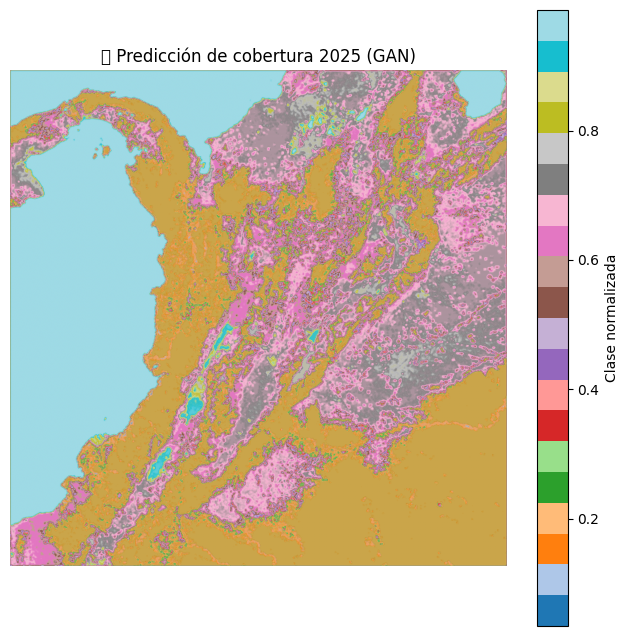

In [31]:
# Usamos la imagen de cobertura 2023 como entrada para predecir 2025
input_image_2025 = normalize(lc_2023)
input_image_2025 = np.expand_dims(input_image_2025, axis=-1)

# Generamos predicción
predicted_2025 = generator.predict(np.expand_dims(input_image_2025, 0))[0, :, :, 0]

# Visualizamos
plt.figure(figsize=(8, 8))
plt.imshow(predicted_2025, cmap='tab20')
plt.title("🛰️ Predicción de cobertura 2025 (GAN)")
plt.axis('off')
plt.colorbar(label='Clase normalizada')
plt.show()


In [33]:
import matplotlib.pyplot as plt

# Guardamos la predicción GAN como PNG de alta calidad
plt.figure(figsize=(8, 8))
plt.imshow(predicted_2025, cmap='tab20')
plt.axis('off')
plt.title("🛰️ Predicción GAN - Cobertura 2025")
plt.colorbar(label='Clase normalizada')
plt.tight_layout()
plt.savefig('Prediccion_GAN_2025.png', dpi=300, bbox_inches='tight')
plt.close()

print("✅ Imagen generada por la GAN guardada como Prediccion_GAN_2025.png")


<ipython-input-33-42283b86bf87>:9: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-42283b86bf87>:10: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.savefig('Prediccion_GAN_2025.png', dpi=300, bbox_inches='tight')


✅ Imagen generada por la GAN guardada como Prediccion_GAN_2025.png


# Comparación visual lado a lado GAN vs. Random Forest

<ipython-input-35-bc96e1308907>:14: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-bc96e1308907>:14: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


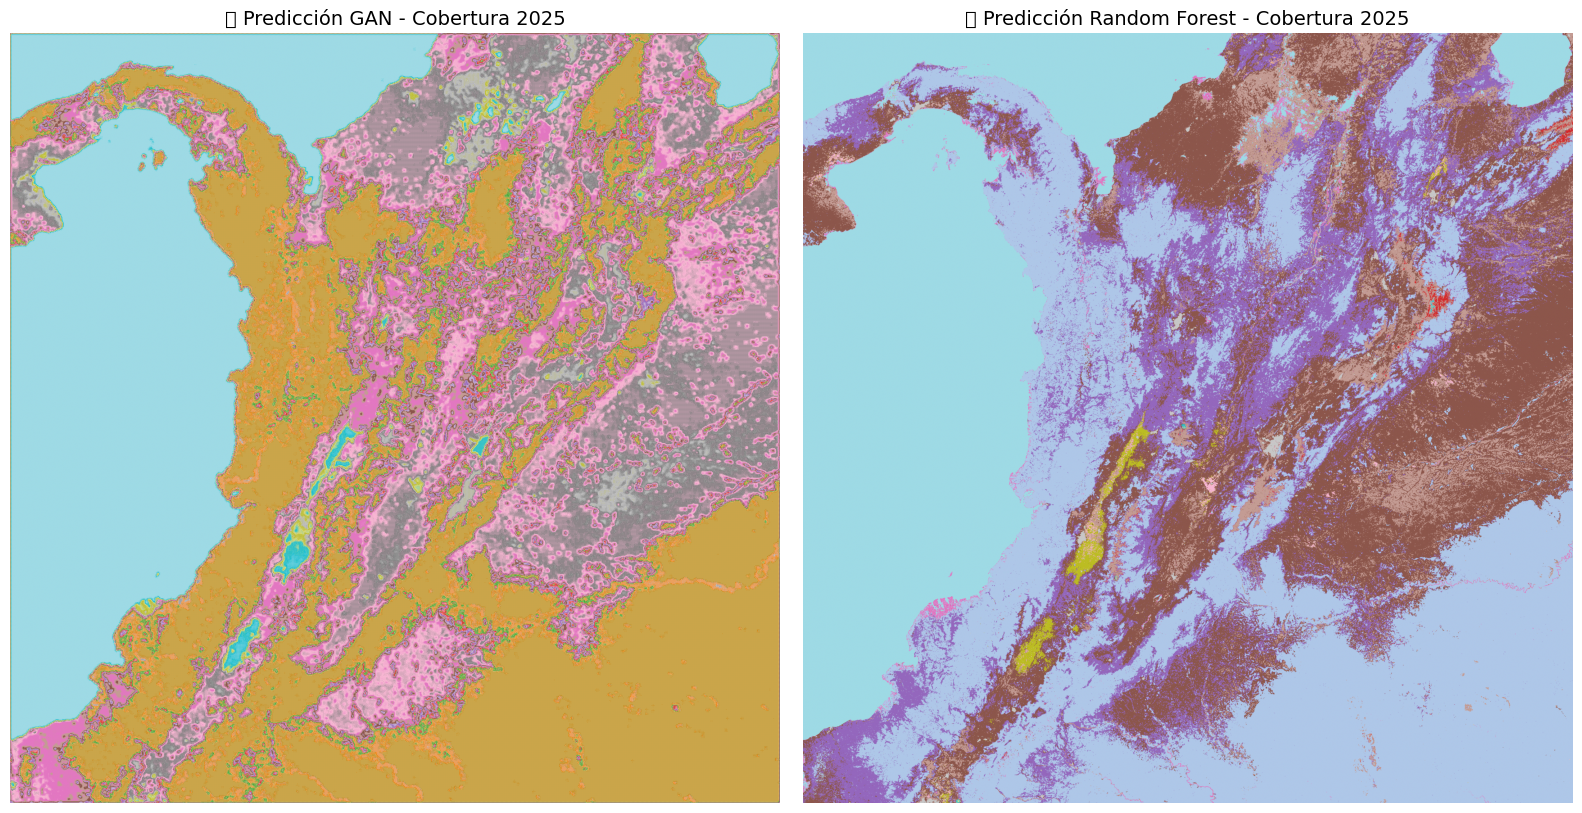

In [35]:
# Configuramos la comparación visual lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Imagen GAN
axes[0].imshow(predicted_2025, cmap='tab20')
axes[0].set_title("🛰️ Predicción GAN - Cobertura 2025", fontsize=14)
axes[0].axis('off')

# Imagen Random Forest
axes[1].imshow(mapa_clasificado, cmap='tab20')
axes[1].set_title("🌲 Predicción Random Forest - Cobertura 2025", fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [37]:
# Asumimos que el output de la GAN está normalizado entre 0-1
# Primero, identificamos las clases originales en la cobertura 2023
unique_classes = np.unique(lc_2023[~np.isnan(lc_2023)]).astype(int)

# Creamos un mapa de clases para la GAN basado en la salida continua
gan_classified = np.zeros_like(predicted_2025)

for class_value in unique_classes:
    # Normalizamos los valores de la clase original al rango [0, 1] para comparación
    class_norm = class_value / np.max(unique_classes)
    # Definimos un rango alrededor del valor normalizado
    tolerance = 1 / len(unique_classes) / 2
    mask = np.abs(predicted_2025 - class_norm) < tolerance
    gan_classified[mask] = class_value

# Ahora gan_classified tiene clases discretas que corresponden a lc_2023 y RF 🎉


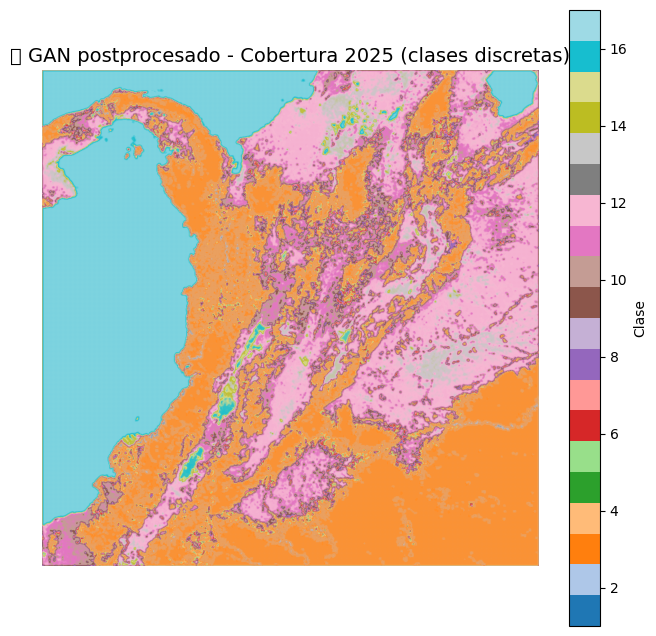

In [38]:
plt.figure(figsize=(8, 8))
plt.imshow(gan_classified, cmap='tab20')
plt.title("🛰️ GAN postprocesado - Cobertura 2025 (clases discretas)", fontsize=14)
plt.axis('off')
plt.colorbar(label='Clase')
plt.show()


## 🔍 Reflexión: Comparación entre GAN y Random Forest

En este proyecto, hemos implementado dos enfoques distintos para predecir la cobertura del suelo para el año 2025:

1. **Random Forest:**
   - Utiliza como entrada la cobertura del suelo del año 2020 y el NDVI del 2025.
   - Se basa en patrones estadísticos y correlaciones actuales.
   - Es sensible a la vegetación existente reflejada en el NDVI, lo que puede resaltar cambios que no necesariamente reflejan un cambio de uso de suelo estructural, sino dinámicas vegetativas temporales.

2. **GAN (Generative Adversarial Network):**
   - Aprende de la evolución visual entre las coberturas del suelo de 2020 y 2023.
   - No depende de variables vegetativas puntuales, sino que modela la progresión espacial de los cambios de uso de suelo.
   - Es capaz de capturar patrones espaciales complejos y continuidades de cambio a lo largo del tiempo.

### 🎯 ¿Qué aporta la comparación?

- La comparación entre ambos enfoques no busca encontrar cuál es "mejor", sino **identificar las fortalezas y limitaciones de cada uno.**
- Las zonas de coincidencia indican **alta confianza** en la predicción de cambio o permanencia.
- Las diferencias reflejan:
  - Cambios graduales que la GAN proyecta, pero que el NDVI actual aún no evidencia.
  - Cambios reflejados en el NDVI pero que no tienen aún respaldo de transición histórica detectada por la GAN.

### ✅ Conclusión:

Comparar ambos modelos enriquece el análisis, ya que nos ofrece:
- Una visión estructural de cambios en la cobertura.
- Una validación cruzada para priorizar áreas de estudio o intervención.
- Un enfoque complementario que puede guiar futuras decisiones, como la planificación territorial, la conservación o el monitoreo agrícola avanzado.

**¡La combinación de enfoques estadísticos y generativos amplifica la capacidad de interpretación de los datos espaciales! 🌍**


💡 ¿Cuál es el plus?

    Mejor comprensión de la dinámica de cambio:
    Ver cómo dos modelos distintos interpretan la evolución del paisaje.

    Validación cruzada entre modelos:
    Si ambos modelos predicen el mismo cambio, es muy probable que sea real.

    Potencial para crear modelos híbridos:
    Podrías combinar GAN + NDVI para enriquecer aún más tus predicciones.

<ipython-input-36-49c0b95d9ad5>:42: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-49c0b95d9ad5>:42: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-49c0b95d9ad5>:42: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-49c0b95d9ad5>:42: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/

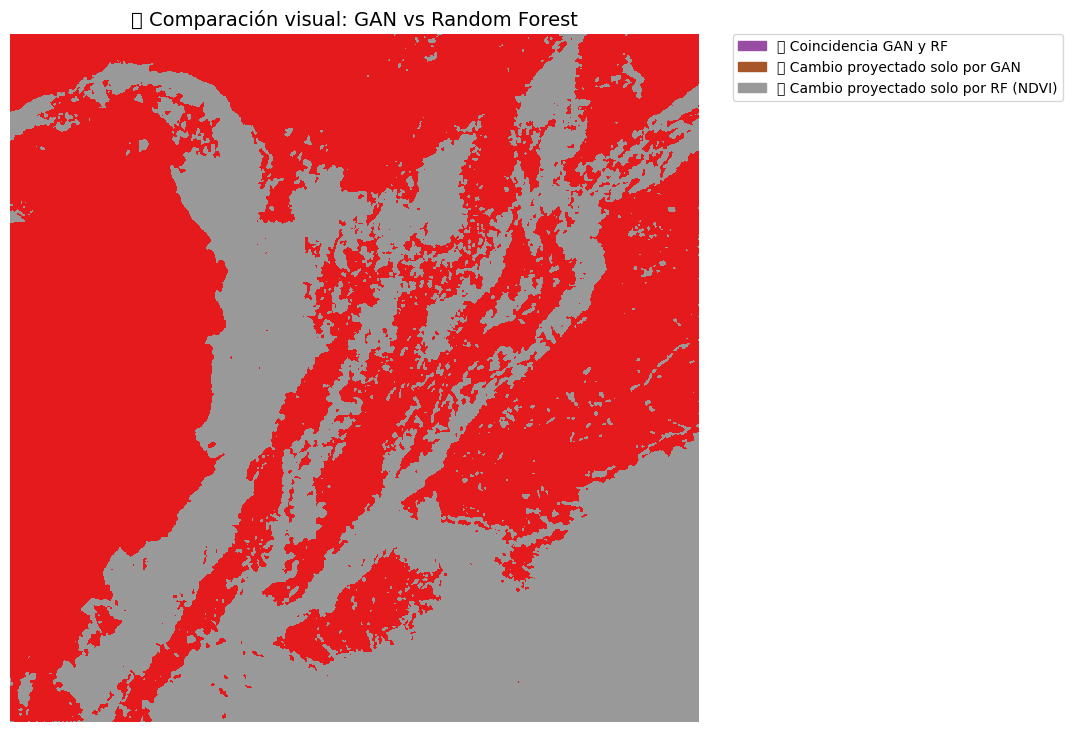

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Preparamos las matrices
gan_map = predicted_2025
rf_map = mapa_clasificado.astype(float)  # Aseguramos tipo float para comparación

# Para simplificar la comparación, normalizamos ambas entre 0-1 (ya que GAN genera valores normalizados)
gan_map_norm = (gan_map > 0.5).astype(int)  # Umbralizamos la predicción GAN para clasificar zonas de cambio
rf_map_norm = (rf_map > 0).astype(int)     # Asumimos clases > 0 son áreas clasificadas

# Creamos un mapa de comparación
comparison_map = np.zeros_like(gan_map_norm)

# 1 = Coincidencia
comparison_map[(gan_map_norm == 1) & (rf_map_norm == 1)] = 1

# 2 = Cambio detectado por GAN pero no por RF
comparison_map[(gan_map_norm == 1) & (rf_map_norm == 0)] = 2

# 3 = Cambio detectado por RF pero no por GAN
comparison_map[(gan_map_norm == 0) & (rf_map_norm == 1)] = 3

# Visualizamos
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('Set1', 4)

im = plt.imshow(comparison_map, cmap=cmap, interpolation='nearest')
plt.title("🔍 Comparación visual: GAN vs Random Forest", fontsize=14)
plt.axis('off')

# Creamos la leyenda manualmente
import matplotlib.patches as mpatches

legend_patches = [
    mpatches.Patch(color=cmap(1/4), label='✅ Coincidencia GAN y RF'),
    mpatches.Patch(color=cmap(2/4), label='🔮 Cambio proyectado solo por GAN'),
    mpatches.Patch(color=cmap(3/4), label='🌿 Cambio proyectado solo por RF (NDVI)'),
]

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()
